# Begin by importing nltk, matplotlib

Also, tell matplotlib to display right in this notebook.

In [53]:
import nltk
import matplotlib
%matplotlib inline

# Now let's get the text

Thank you, Project Gutenberg!

In [2]:
from urllib.request import urlopen

In [3]:
my_url = "https://www.gutenberg.org/files/205/205-0.txt"

In [4]:
file = urlopen(my_url)

In [5]:
raw = file.read()

In [6]:
type(raw)

bytes

# Uh-oh, the text is in bytes. We need a string.

In [7]:
walden = raw.decode()

In [8]:
type(walden)

str

# Tokenize

In [9]:
walden_tokens = nltk.word_tokenize(walden)

In [10]:
type(walden_tokens)

list

In [11]:
walden[:30]

'\ufeff\r\nThe Project Gutenberg EBook'

# Hmmm, this doesn't look like *Walden*

We need to slice the file so we're not including Gutenberg metadata or "Civil Disobedience."

In [12]:
walden_text = walden_tokens[187:122155]

In [13]:
walden_text[:10]

['Economy',
 'When',
 'I',
 'wrote',
 'the',
 'following',
 'pages',
 ',',
 'or',
 'rather']

In [14]:
walden_text[121964:121968] #121555 - 187 = 121968

['a', 'morning', 'star', '.']

# Let's create an NLTK book object

We'll use this a little farther down.

In [15]:
walden_nltk_text = nltk.Text(walden_text)

# Let's do some text cleaning

In [16]:
from nltk.corpus import stopwords

In [17]:
mystops = stopwords.words('english')

In [18]:
walden_clean = [w for w in walden_text if w not in mystops]

In [19]:
walden_clean = [t.lower() for t in walden_clean if t.isalpha()]

In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
wordnet_lemmatizer = WordNetLemmatizer()

In [22]:
walden_clean = [wordnet_lemmatizer.lemmatize(t) for t in walden_clean]

# Let's look at lexical diversity

We'll use the full text for this, without removing stop words. We could do the same thing minus the stop words, too. It would yield a slightly different result.

In [59]:
len(walden_nltk_text)

121968

In [60]:
len(set(walden_nltk_text))

12015

In [61]:
walden_diversity = (len(set(walden_nltk_text))) / (len(walden_nltk_text)) 

In [57]:
walden_diversity

0.09850944510035418

# Let's look at our lemmatized list of *Walden* words

Minus the stop words, that is.

In [62]:
sorted(set(walden_clean))

['a',
 'ab',
 'abandon',
 'abandoned',
 'abandonment',
 'abdomen',
 'abelard',
 'abetted',
 'ability',
 'abject',
 'able',
 'aboard',
 'abode',
 'aboriginal',
 'aborigine',
 'abounded',
 'about',
 'above',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'abstain',
 'abstemiousness',
 'abstinence',
 'abstract',
 'abstraction',
 'abundance',
 'abundant',
 'abutment',
 'abuts',
 'abutted',
 'acanthus',
 'accent',
 'accented',
 'accept',
 'accepted',
 'access',
 'accessible',
 'accident',
 'accidental',
 'accidentally',
 'accompanied',
 'accompaniment',
 'accompany',
 'accomplish',
 'accomplished',
 'accomplishing',
 'accomplishment',
 'according',
 'accordingly',
 'account',
 'accounted',
 'accumulate',
 'accumulated',
 'accumulating',
 'accuracy',
 'accurately',
 'accursed',
 'accustomed',
 'acheron',
 'achillean',
 'achilles',
 'acid',
 'acknowledged',
 'acorn',
 'acquaintance',
 'acquainted',
 'acquire',
 'acq

# Let's look at some words in context

If we used the cleaned text for this we'd have missing words on either side.

In [63]:
walden_nltk_text.concordance("nature")

Displaying 25 of 94 matches:
pproving that our bodies of a stony nature are. ” So much for a blind obedienc
f him . The finest qualities of our nature , like the bloom on fruits , can be
g the same one at the same moment ! Nature and human life are as various as ou
s as we honestly bestow elsewhere . Nature is as well adapted to our weakness 
 and dogs acquiring the same second nature . By proper Shelter and Clothing we
akes families run out ? What is the nature of the luxury which enervates and d
ept , but inseparable from its very nature . I would gladly tell all that I kn
e dawn merely , but , if possible , Nature herself ! How many mornings , summe
lmost entirely of such materials as Nature furnished ready to their hands . Go
y left him still but a sojourner in nature . When he was refreshed with food a
, a cellar , a garret , have in the nature of man , and perchance never raisin
o retreat behind some curtain which nature has provided , than to add a single
t us first be as simple

In [28]:
walden_nltk_text.similar("read")

see have know make be live made get hear in had at not do eat with yet
let by call


# Let's do some counting

In [29]:
walden_nltk_text.count("nature")

28

# Hmmm, that seems kind of low.

What if we look at *Nature* as well?

In [32]:
walden_nltk_text.count("Nature")

66

# Better make everything lower case again

In [33]:
walden_nltk_nocase = [t.lower() for t in walden_nltk_text if t.isalpha()]

In [35]:
walden_nltk_nocase.count("nature")

94

# That's better

28 + 66 = 94

# Let's plot a frequency distribution

In [64]:
from nltk import FreqDist

In [65]:
walden_dist = FreqDist(walden_nltk_nocase)

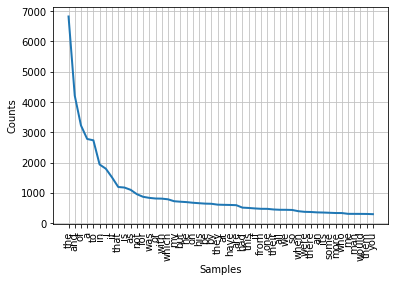

In [40]:
walden_dist.plot(50, cumulative=False)

# So *the* is the most frequent word? Duh.

Better remove the stopwords again.

In [41]:
walden_nltk_nocase_stops = [w for w in walden_nltk_nocase if w not in mystops]

In [42]:
walden_dist_stops = FreqDist(walden_nltk_nocase_stops)

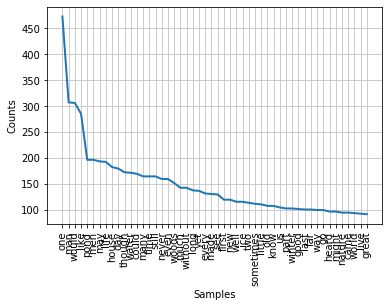

In [43]:
walden_dist_stops.plot(50, cumulative=False)

# Let's compare the most common words with and without the stops

In [44]:
walden_dist.most_common(50)

[('the', 6822),
 ('and', 4209),
 ('of', 3226),
 ('a', 2779),
 ('to', 2735),
 ('in', 1937),
 ('i', 1798),
 ('it', 1511),
 ('that', 1194),
 ('is', 1176),
 ('as', 1100),
 ('not', 957),
 ('for', 870),
 ('was', 835),
 ('or', 814),
 ('with', 810),
 ('which', 788),
 ('my', 724),
 ('but', 708),
 ('he', 695),
 ('on', 674),
 ('his', 659),
 ('be', 645),
 ('by', 640),
 ('they', 611),
 ('at', 605),
 ('have', 601),
 ('are', 594),
 ('had', 513),
 ('this', 502),
 ('if', 486),
 ('from', 474),
 ('one', 473),
 ('their', 452),
 ('all', 442),
 ('we', 441),
 ('so', 436),
 ('when', 395),
 ('were', 374),
 ('there', 369),
 ('an', 356),
 ('its', 351),
 ('some', 343),
 ('more', 335),
 ('who', 334),
 ('me', 308),
 ('man', 307),
 ('would', 306),
 ('them', 304),
 ('you', 297)]

In [45]:
walden_dist_stops.most_common(50)

[('one', 473),
 ('man', 307),
 ('would', 306),
 ('like', 285),
 ('pond', 196),
 ('men', 196),
 ('may', 193),
 ('life', 192),
 ('house', 182),
 ('day', 179),
 ('though', 172),
 ('water', 171),
 ('could', 169),
 ('many', 164),
 ('time', 164),
 ('still', 164),
 ('never', 159),
 ('even', 159),
 ('woods', 151),
 ('much', 142),
 ('without', 142),
 ('long', 137),
 ('yet', 136),
 ('every', 131),
 ('made', 130),
 ('see', 129),
 ('first', 119),
 ('new', 119),
 ('well', 115),
 ('ice', 115),
 ('two', 113),
 ('sometimes', 111),
 ('little', 110),
 ('old', 107),
 ('know', 107),
 ('us', 104),
 ('part', 102),
 ('winter', 102),
 ('good', 101),
 ('last', 100),
 ('far', 100),
 ('way', 99),
 ('go', 99),
 ('heard', 96),
 ('might', 96),
 ('nature', 94),
 ('came', 94),
 ('world', 93),
 ('live', 92),
 ('great', 91)]

# We'll go back to our original book object to do some dispersion plots

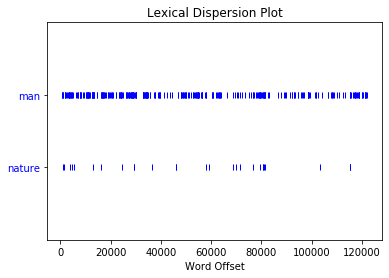

In [50]:
walden_nltk_text.dispersion_plot(['man', 'nature'])

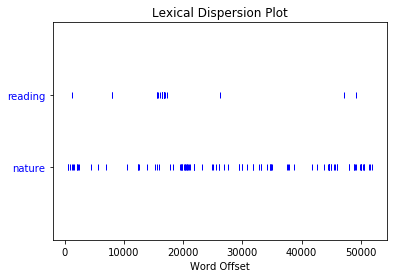

In [172]:
walden_nltk_text.dispersion_plot(['reading', 'nature'])

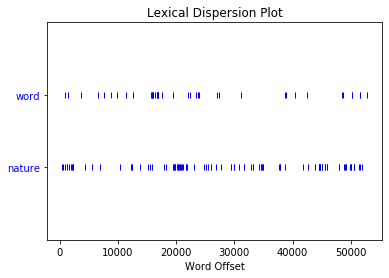

In [175]:
walden_nltk_text.dispersion_plot(['word', 'nature'])

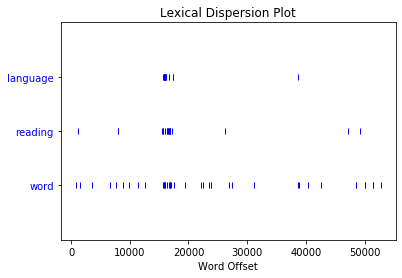

In [176]:
walden_nltk_text.dispersion_plot(['language', 'reading', 'word'])